In [8]:
import sys
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [10]:
pd.pandas.set_option('display.max_columns',None)

In [11]:
pwd

'/home/yiw084/Documents/GitHub/ECE143_Group6'

In [20]:
# raw dataset or unprocessed dataset
data_path = './Data/original_data.csv'
dataset = pd.read_csv(data_path)
## print shape of dataset with rows and columns
print(dataset.shape)

(53644, 26)


In [23]:
# GRE score conversion table
score_table = pd.read_csv('./Data/score.csv')
score_table.head()

,old,newQ,newV
0,800,166,170
1,790,164,170
2,780,163,170
3,770,161,170
4,760,160,170


In [21]:
dataset.head(10)

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,greV,greQ,userProfileLink,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,160.0,167.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,8.90,Fall - 2015,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,0,NaN,0.00,Fall - 2013,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,146.0,157.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,3.0,81.00,Fall - 2015,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,420.0,770.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,70.00,Fall - 2011,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1
5,abhishek001,MIS,0,0,Information Security Management,273.0,MS,CE,6,0.0,410.0,1010.0,http://www.edulix.com/unisearch/user.php?uid=145,0,600.0,75.00,Fall - 2006,0,Thadomal Shahani Engineering College,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
6,agteakash,MIS,0,0,Business Analytics,104.0,MS,Computer Engineering,27,0.0,150.0,161.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,77.81,Fall - 2015,0,University of Mumbai,NaN,62.20,NaN,100,NaN,Worcester Polytechnic Institute,1
7,alankarMIS,MIS-management related courses,0,0,NaN,95.0,MS,IT,22,0.0,147.0,156.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,76.00,Fall - 2012,0,MU,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
8,amandeepsharma89,MIS,0,0,NaN,101.0,MS,I.T,24,0.0,490.0,740.0,http://www.edulix.com/unisearch/user.php?uid=6415,0,3.0,74.00,Fall - 2011,0,MU,NaN,64.00,NaN,100,NaN,Worcester Polytechnic Institute,1
9,amatelia3,Computer Science,0,0,NaN,107.0,MS,Information Technology,NaN,0.0,550.0,780.0,http://www.edulix.com/unisearch/user.php?uid=4175,0,4.5,0.00,Fall - 2011,0,K J Somaiya College of Engiineering,NaN,71.40,NaN,100,NaN,Worcester Polytechnic Institute,1


In [14]:
pd.unique(dataset['program'])

array(['MS', nan, 'PhD', 'Both MS and PhD', 'MS/PhD'], dtype=object)

### Missing Values

In [6]:
# make a list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
# print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, '\t\t',np.round(dataset[feature].isnull().mean(), 4), '\t','% missing values')

major 		 0.0072 	 % missing values
specialization 		 0.4044 	 % missing values
toeflScore 		 0.0823 	 % missing values
program 		 0.006 	 % missing values
toeflEssay 		 0.7787 	 % missing values
internExp 		 0.0003 	 % missing values
greV 		 0.0234 	 % missing values
greQ 		 0.0227 	 % missing values
journalPubs 		 0.006 	 % missing values
greA 		 0.0533 	 % missing values
topperCgpa 		 0.0001 	 % missing values
termAndYear 		 0.006 	 % missing values
confPubs 		 0.006 	 % missing values
ugCollege 		 0.0425 	 % missing values
gmatA 		 0.9978 	 % missing values
gmatQ 		 0.9977 	 % missing values
gmatV 		 0.9979 	 % missing values


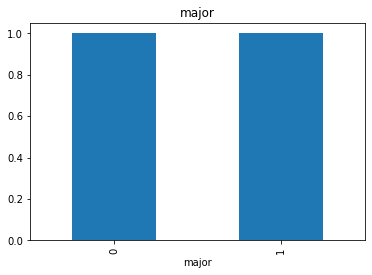

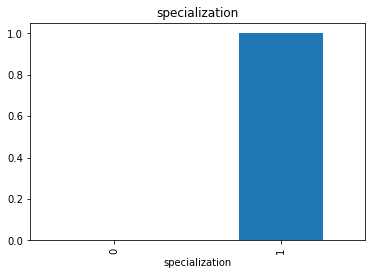

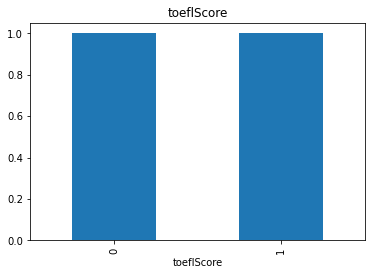

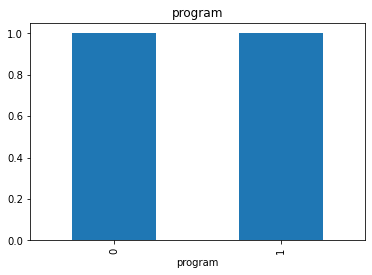

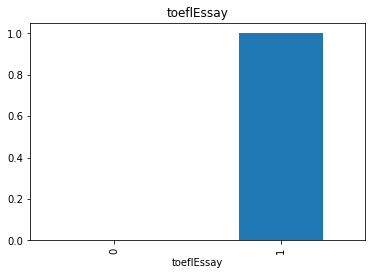

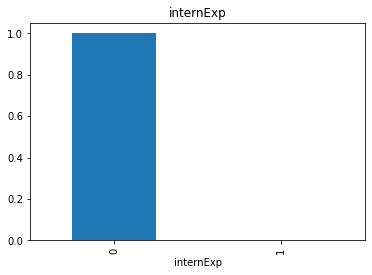

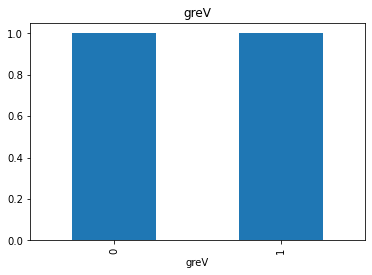

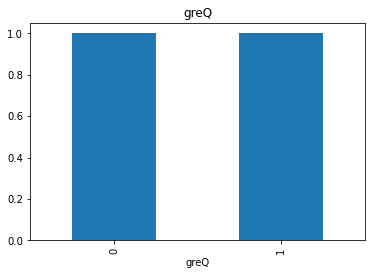

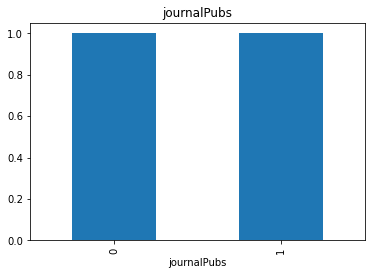

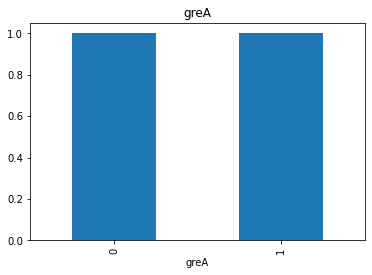

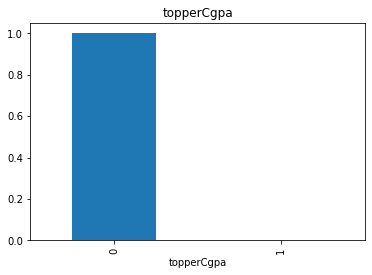

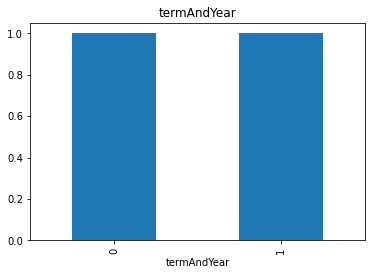

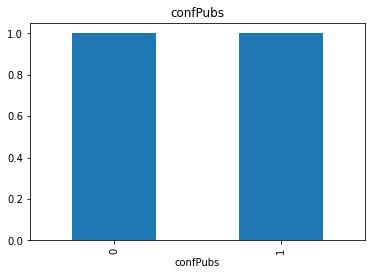

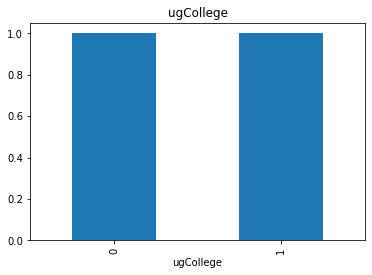

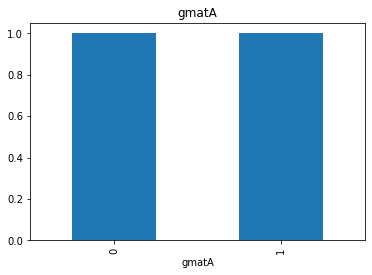

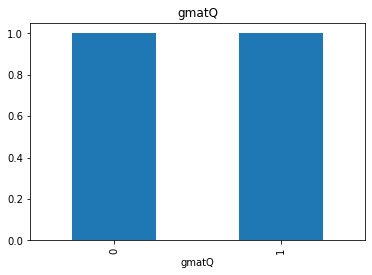

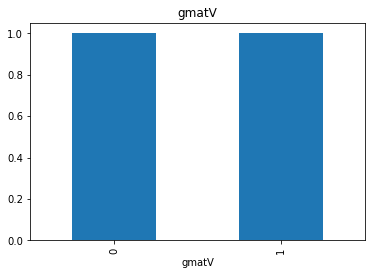

In [7]:

for feature in features_with_na:
    data = dataset.copy()
    
    # make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['admit'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [15]:
# Drop gmatA, gmatQ, gmatQ, userProfileLink, 

In [17]:
print('userName {}'.format(len(dataset['userName'])))

userName 53644


### Numerical Variables